<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://github.com/mfilipak/FILIPAK-DATA-SCIENCE/raw/main/DATA/2021_Time_Volume_Price.zip

--2024-03-31 22:24:57--  https://github.com/mfilipak/FILIPAK-DATA-SCIENCE/raw/main/DATA/2021_Time_Volume_Price.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mfilipak/FILIPAK-DATA-SCIENCE/main/DATA/2021_Time_Volume_Price.zip [following]
--2024-03-31 22:24:57--  https://raw.githubusercontent.com/mfilipak/FILIPAK-DATA-SCIENCE/main/DATA/2021_Time_Volume_Price.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13887076 (13M) [application/zip]
Saving to: ‘2021_Time_Volume_Price.zip.1’

2021_Time_Volume_Pr 100%[===================>]  13.24M  --.-KB/s    in 0.1s    

2024-03-31 22:24:58 (119 MB/s

In [6]:
!ls

2021_Time_Volume_Price.zip  2021_Time_Volume_Price.zip.1  sample_data


In [2]:
import pandas as pd

In [8]:
df = pd.read_csv("./2021_Time_Volume_Price.zip", index_col=0)

In [9]:
df

,Volume,MeanPrice,MinPrice,MaxPrice,OpenPrice,ClosePrice
Seconds,,,,,,
61045175.0,0.0,114590.0,114590.0,114590.0,114590.0,114590.0
61045176.0,0.0,114590.0,114590.0,114590.0,114590.0,114590.0
61045177.0,0.0,114590.0,114590.0,114590.0,114590.0,114590.0
61045178.0,0.0,114590.0,114590.0,114590.0,114590.0,114590.0
61045179.0,0.0,114590.0,114590.0,114590.0,114590.0,114590.0
...,...,...,...,...,...,...
72899705.0,0.0,121200.0,121200.0,121200.0,121200.0,121200.0
72899706.0,0.0,121200.0,121200.0,121200.0,121200.0,121200.0
72899707.0,0.0,121200.0,121200.0,121200.0,121200.0,121200.0


In [10]:
import matplotlib.pyplot as plt

In [29]:
df.index

Float64Index([61045175.0, 61045176.0, 61045177.0, 61045178.0, 61045179.0,
              61045180.0, 61045181.0, 61045182.0, 61045798.0, 61045799.0,
              ...
              72899700.0, 72899701.0, 72899702.0, 72899703.0, 72899704.0,
              72899705.0, 72899706.0, 72899707.0, 72899708.0, 72900218.0],
             dtype='float64', name='Seconds', length=2649168)

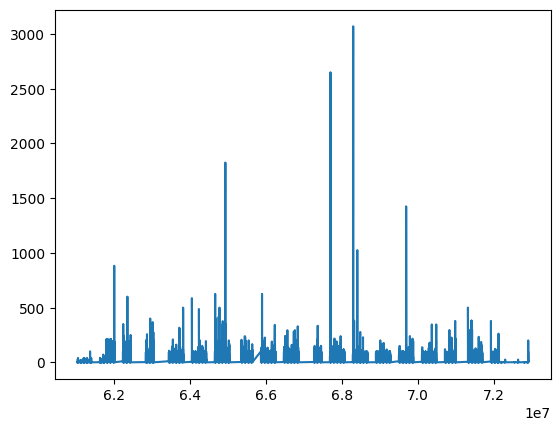

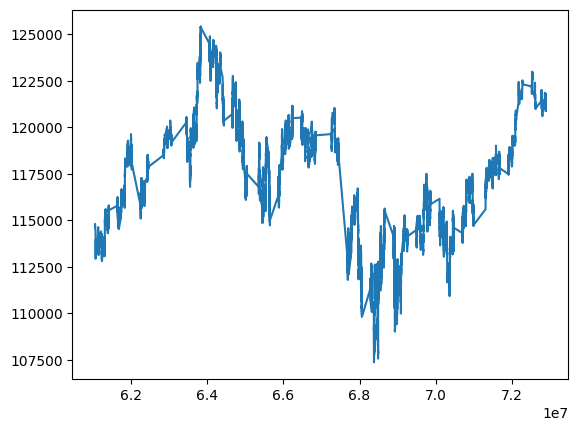

In [32]:
plt.plot(df["Volume"])
plt.show()
plt.plot(df["MeanPrice"])

In [43]:
delta_t = [0]+list(df.index[1:]-df.index[:-1])
delta_t[:10]

[0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 616.0, 1.0]

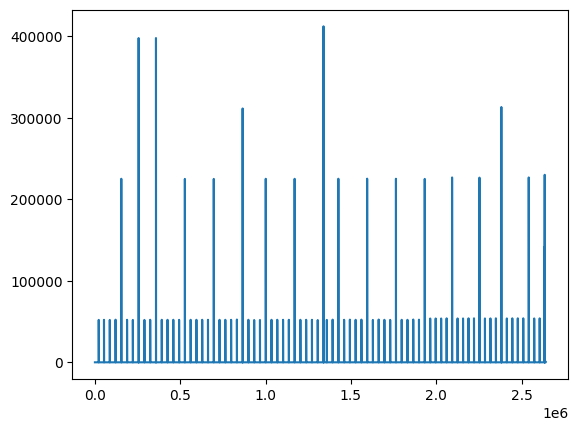

In [53]:
plt.plot(delta_t[7000:])